# Gradient discent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def f1(x_R2):
    return (x_R2[0]-3)**2+(x_R2[1]-1)**2
def grad_f1(x_R2):
    return np.array((2*(x_R2[0]-3),2*(x_R2[1]-1)))

def f2(x_R2):
    return 10*(x_R2[0]-1)**2+(x_R2[1]-2)**2
def grad_f2(x_R2):
    return np.array((20*(x_R2[0]-1),2*(x_R2[1]-2)))

def f3(x_Rn):   
    A=np.vander(np.linspace(0,1,len(x_Rn)))
    return 0.5*np.linalg.norm(A@x_Rn-A@np.ones(len(x_Rn),),2)**2
def grad_f3(x_Rn):
    A=np.vander(np.linspace(0,1,len(x_Rn),dtype=int))
    grad=A.T@np.array(A@x_Rn-A@np.ones(len(x_Rn),))
    return grad.reshape(1,len(grad))


def f4(x_Rn,lambda_):
    #lambda must be from zero to one
    lambda_=lambda_
    phi=np.vander(np.linspace(0,1,len(x_Rn)),len(x_Rn))
    return  0.5*(np.linalg.norm(phi@x_Rn-phi@np.ones(len(x_Rn),),2)**2+lambda_*np.linalg.norm(x_Rn,2)**2)
def grad_f4(x_Rn,lambda_):
    A=np.vander(np.linspace(0,1,len(x_Rn)),len(x_Rn))
    lambda_=lambda_
    grad=(A.T@np.array(A@x_Rn-A@np.ones(len(x_Rn))) +lambda_*np.array(x_Rn))
    return grad

def f5(x):
    return (x**4+x**3-2*x**2-2*x)
def grad_f5(x):
    return (4*x**3+3*x**2-4*x-2)

In [4]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x),2)**2 :
        alpha = tau * alpha
        if alpha < 1e-3:
            break
    return alpha


In [5]:
def GD(f,grad_f,x0,tolf=10e-6,tolx=10e-6,kmax=100,alpha=0.1):
    #As output x as stationary point
    #f<-val a vector containing the values of f during the iterations
    #err_vall a vector containing the values of || grad of f(x,k)||
    var = alpha
    alpha = alpha
    #initialization:
    x0 = np.array(x0)
    x = np.zeros((kmax+1,x0.shape[0]))
    f_vec = np.zeros((kmax+1,))
    err_vec = np.zeros((kmax+1,))
    grad_vec = np.zeros((kmax+1,x0.shape[0]))
    cond1 = True
    cond2 = True
    f_vec[0] = f(x0)
    grad_vec[0] = grad_f(x0)
    x[0] = x0
    k = 1
    err_vec[0]=np.linalg.norm(grad_f(x0),2)                                 
    while(cond1 and cond2 and k<kmax):
        if var == True:
             alpha = backtracking(f,grad_f,x[k-1])
        else:
            alpha = alpha
        x[k] = x[k-1]-alpha*grad_vec[k-1]
        f_vec[k] = f(x[k])  
        grad_vec[k] = grad_f(x[k])
        err_vec[k] = np.linalg.norm(grad_vec[k],2)
        cond1 = np.linalg.norm(grad_vec[k],2)>tolf*np.linalg.norm(grad_vec[0],2) 
        cond2 = np.linalg.norm(x[k]-x[k-1],2)>tolx*np.linalg.norm(x[k-1],2)
        k += 1
    return x,f_vec,err_vec,grad_vec,k


#### Punto 1
Funzione 1

0.1 min= [2.99989547 0.99996516] 
0.03 min= [2.99344189 0.99781396] 
0.001 min= [0.53937834 0.17979278] 
1.0 min= [2.99979969 0.99993323] 


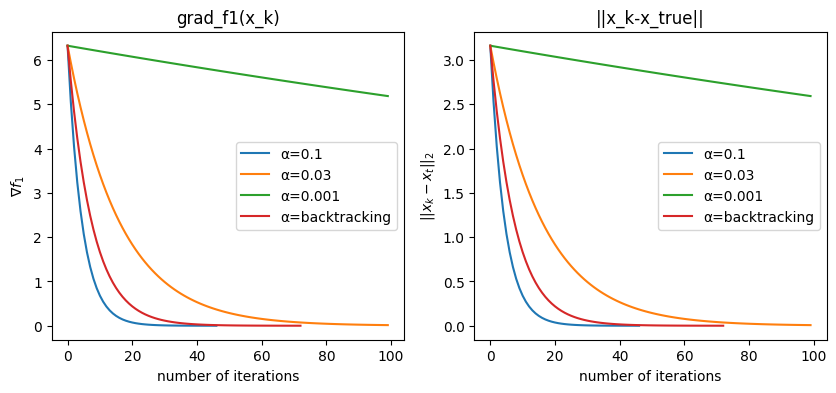

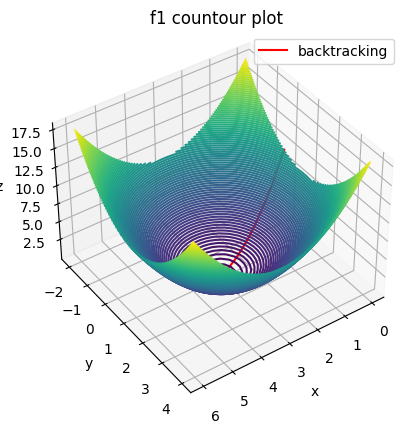

In [25]:
alpha=np.array([0.1,0.03,0.001,True])
plt.figure(figsize=(10,4))
legend=["α=0.1","α=0.03","α=0.001","α=backtracking"]
sol=np.array((3,1))
plt.subplot(1,2,1)
plt.title("grad_f1(x_k)")
for i in alpha:
    x,f_vec,err_vec,grad_vec,k=GD(f1,grad_f1,alpha=i,x0=(0,0),kmax=100)
    k_vec=np.linspace(0,k-1,k,dtype=int)
    plt.plot(k_vec,err_vec[:k])    
    print(f"{i} min= { x[k-1] } ")
plt.xlabel("number of iterations")
plt.ylabel(f"||∇$f_1$||")
plt.legend(legend)
    
plt.subplot(1,2,2)
plt.title("||x_k-x_true||")
for i in alpha:
    x,f_vec,err_vec,grad_vec,k=GD(f1,grad_f1,alpha=i,x0=(0,0),kmax=100)
    k_vec=np.linspace(0,k-1,k,dtype=int)
    error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
    plt.plot(k_vec,error[:k])
plt.legend(legend)
plt.xlabel("number of iterations")
plt.ylabel(f"$||x_k-x_t||_2$")
plt.show()

#plt.figure()
#plt.title("Plot countour f1")

xv = np.linspace(0,6, 30)
yv = np.linspace(-2,4, 30)
xx,yy=np.meshgrid(xv,yv)
def f1_plot(x1,x2):
    return (x1-3)**2+(x2-1)**2
zz=f1_plot(xx,yy)
ax = plt.axes(projection='3d')
ax.set_title("f1 countour plot")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.contour3D(xv, yv, zz,100)
ax.view_init(40, 55)
#plt.contour(xx,yy,zz)
z = f1_plot(x[:k,0],x[:k,1])
plt.plot(x[:k,0],x[:k,1],z,color="red",);
plt.legend(["backtracking"]);

### Function 2

0.1 min= [2. 2.] 
0.03 min= [1.         1.99562793] 
0.001 min= [0.86467392 0.35958556] 
1.0 min= [1.         1.99986034] 


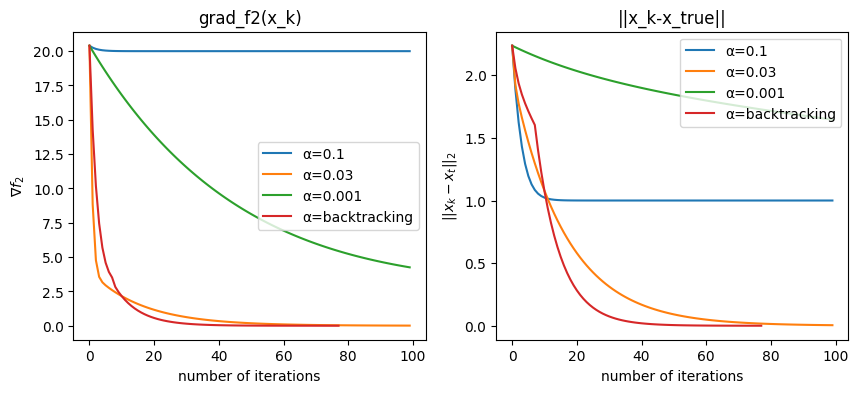

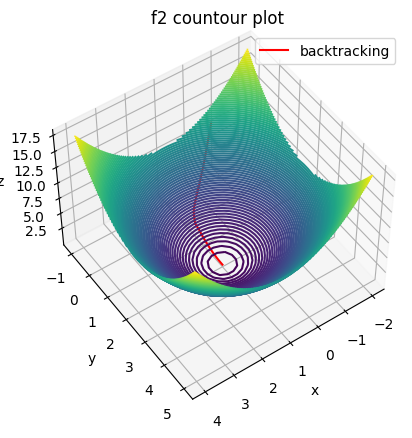

In [26]:
alpha=np.array([0.1,0.03,0.001,True])
plt.figure(figsize=(10,4))
legend=["α=0.1","α=0.03","α=0.001","α=backtracking"]
sol=np.array((1,2))
plt.subplot(1,2,1)
for i in alpha:
    x,f_vec,err_vec,grad_vec,k=GD(f2,grad_f2,alpha=i,x0=(0,0),kmax=100)
    k_vec=np.linspace(0,k-1,k,dtype=int)
    plt.subplot(1,2,1)
    plt.title("grad_f2(x_k)")
    plt.plot(k_vec,err_vec[:k])
    print(f"{i} min= { x[k-1] } ")
plt.legend(legend) 
plt.xlabel("number of iterations")
plt.ylabel(f"||∇$f_2$||")


plt.subplot(1,2,2)
for i in alpha:
    x,f_vec,err_vec,grad_vec,k=GD(f2,grad_f2,alpha=i,x0=(0,0),kmax=100)
    k_vec=np.linspace(0,k-1,k,dtype=int)
    plt.title("||x_k-x_true||")
    error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
    plt.plot(k_vec,error[:k])
plt.legend(legend)
plt.xlabel("number of iterations")
plt.ylabel(f"$||x_k-x_t||_2$")
plt.show()

xv = np.linspace(-2,4, 30)
yv = np.linspace(-1,5, 30)
def f2_plot(x1,x2):
     return 10*(x1-1)**2+(x2-2)**2

ax = plt.axes(projection='3d')
ax.set_title("f2 countour plot")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.contour3D(xv,yv, zz,100)
ax.view_init(50, 55)
z = f2_plot(x[:k,0],x[:k,1])
plt.plot(x[:k,0],x[:k,1],z,color="red",);
plt.legend(["backtracking"]);

### Function 3

dimension =  5


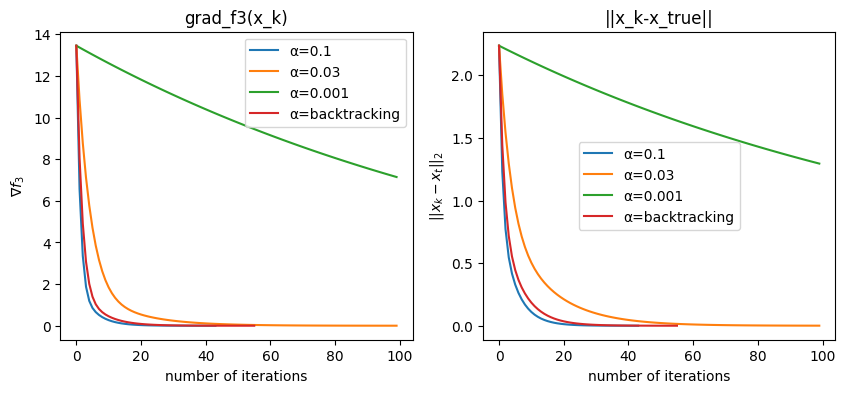

dimension =  15


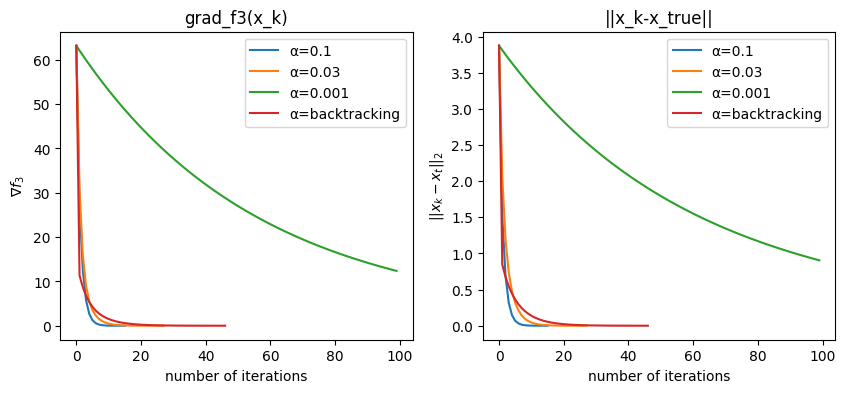

dimension =  20


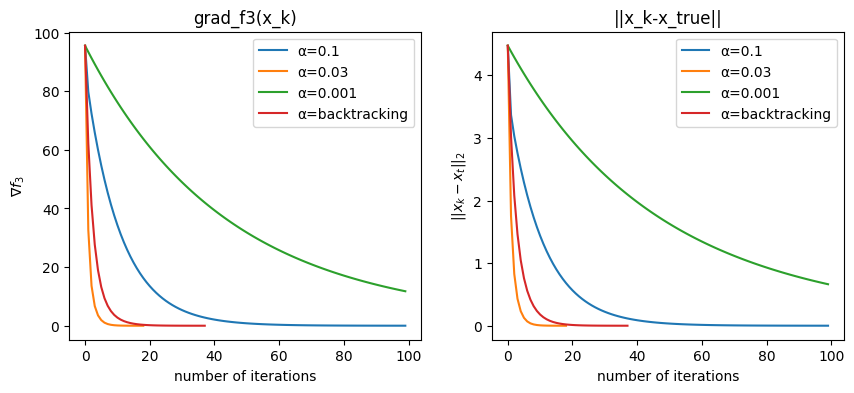

In [27]:

n=np.array([5,15,20])
alpha=np.array([0.08,0.03,0.001,True])
legend=["α=0.1","α=0.03","α=0.001","α=backtracking"]
for j in n:
    sol=np.ones((j,))
    print("dimension = ",j)
    plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    plt.title("grad_f3(x_k)")
    for i in alpha:
        x,f_vec,err_vec,grad_vec,k=GD(f3,grad_f3,alpha=i,x0=np.zeros((j,)),kmax=100)
        k_vec=np.linspace(0,k-1,k,dtype=int)
        plt.plot(k_vec,err_vec[:k])
        #print(f"{i} min= { x[k-1] } ")
    plt.legend(legend)  
    plt.xlabel("number of iterations")
    plt.ylabel(f"||∇$f_3$||")

    
    
    plt.subplot(1,2,2)
    plt.title("||x_k-x_true||")
    for i in alpha:
        x,f_vec,err_vec,grad_vec,k=GD(f3,grad_f3,alpha=i,x0=np.zeros((j,)),kmax=100)
        k_vec=np.linspace(0,k-1,k,dtype=int)
        error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
        plt.plot(k_vec,error[:k])
    plt.legend(legend)   
    plt.xlabel("number of iterations")
    plt.ylabel(f"$||x_k-x_t||_2$") 
    plt.show()


### Function 4

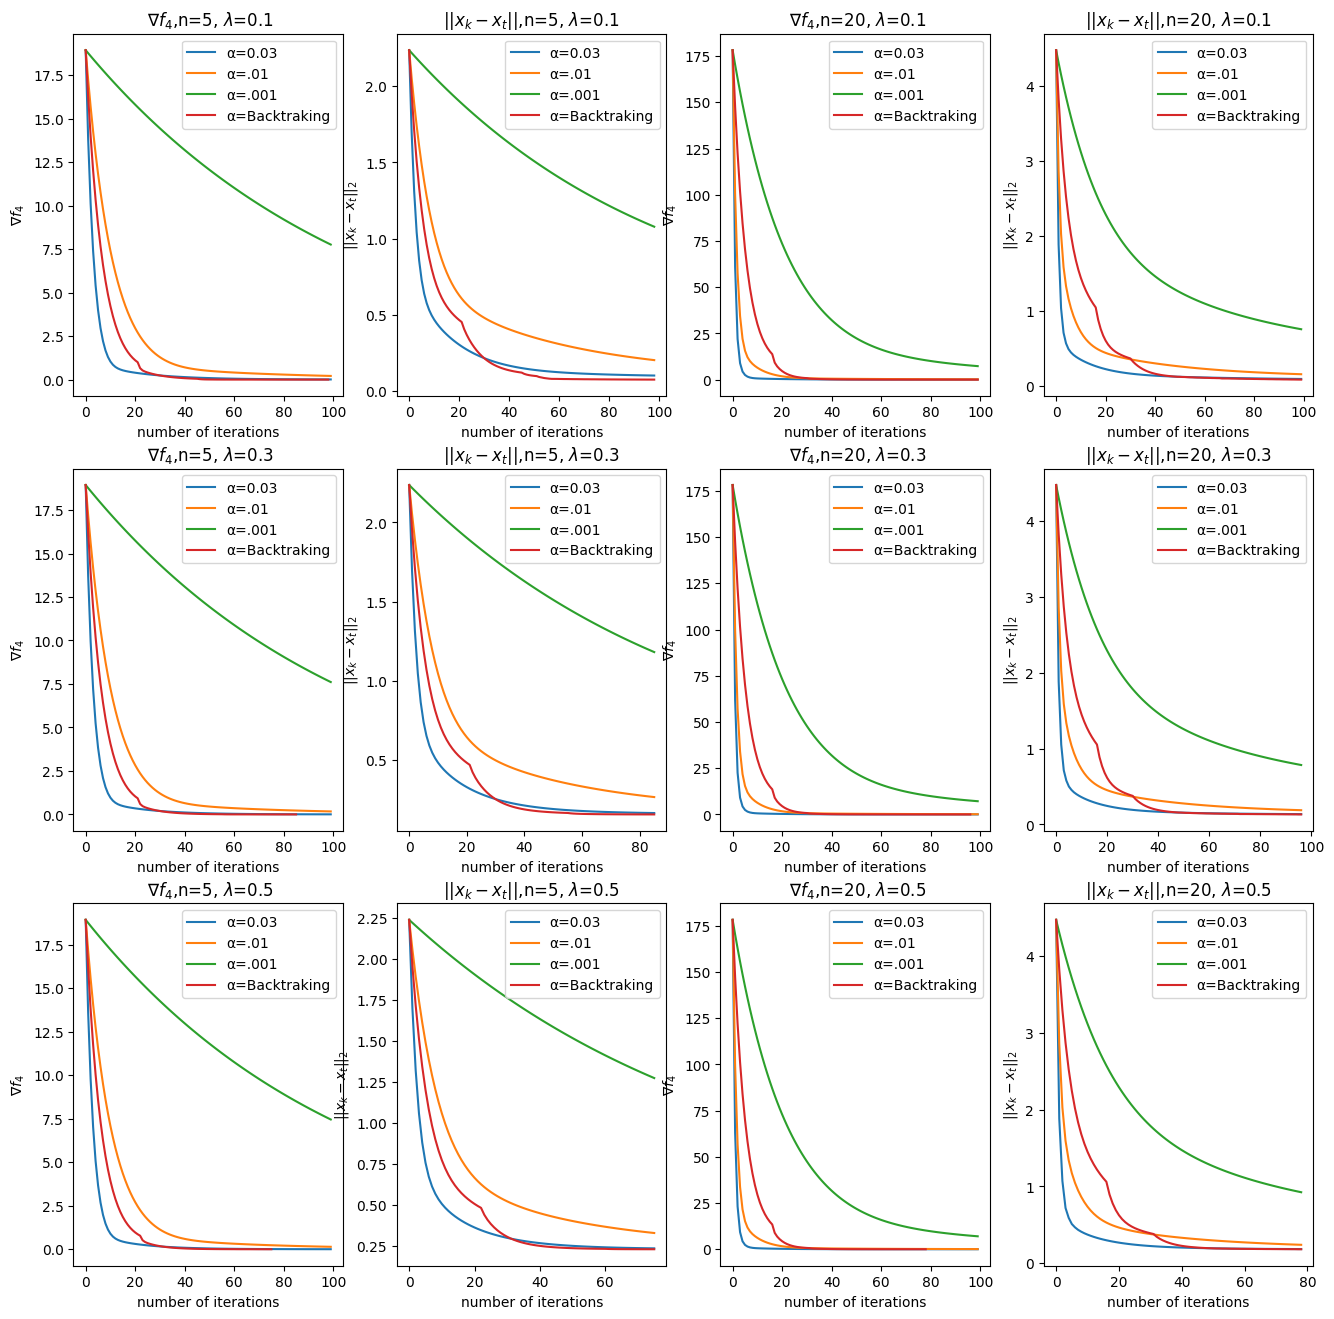

In [33]:
n=np.array([5,20])
alpha=np.array([0.03,.01, .001,True])
legend=["α=0.03","α=.01","α=.001","α=Backtraking"]
lambda_=[0.1,0.3,0.5]
plt.figure(figsize=[16,16])
index=1
for indl,lam in enumerate(lambda_):
    for ind,j in enumerate(n):
        plt.subplot(len(lambda_),len(n)*2,index)
        sol=np.ones((j,))
        plt.title(f" ∇$f_4$,n={j}, $\lambda$={lam}")
        for i in alpha:
                gradf4 = lambda x_Rn: grad_f4(x_Rn,lam)
                f_4 = lambda x_Rn : f4(x_Rn,lam)
                x,f_vec,err_vec,grad_vec,k=GD(f_4,gradf4,alpha=i,x0=np.zeros((j,)),kmax=100)
                k_vec=np.linspace(0,k-1,k,dtype=int)
                plt.plot(k_vec,err_vec[:k])
        plt.legend(legend)
        plt.xlabel("number of iterations")
        plt.ylabel(f"||∇$f_4$||")
        plt.subplot(len(lambda_),len(n)*2,index+1)
        plt.title(f"||$x_k-x_t$||,n={j}, $\lambda$={lam}")
        for i in alpha:
                gradf4=lambda x_Rn: grad_f4(x_Rn,lam)
                f_4 = lambda x_Rn : f4(x_Rn,lam)
                x,f_vec,err_vec,grad_vec,k=GD(f_4,gradf4,alpha=i,x0=np.zeros((j,)),kmax=100)
                error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
                plt.plot(k_vec,error)
        plt.legend(legend)
        plt.xlabel("number of iterations")
        plt.ylabel(f"$||x_k-x_t||_2$") 
        index+=2
plt.show()

In [16]:
#when we add the regularization term alpha must be choosen carefully.

### Function 5

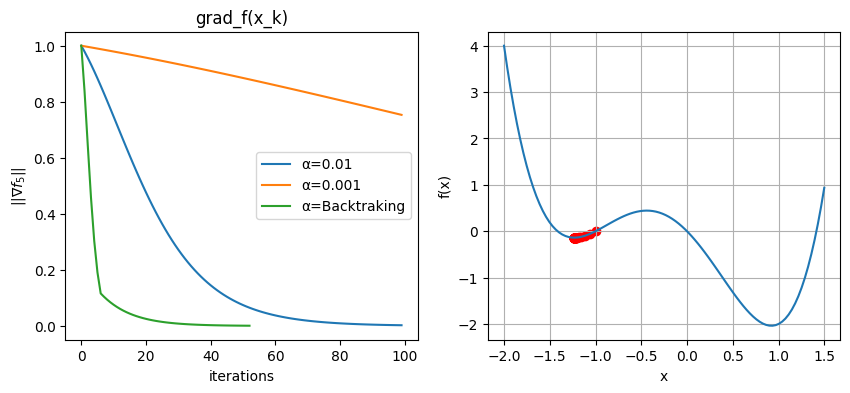

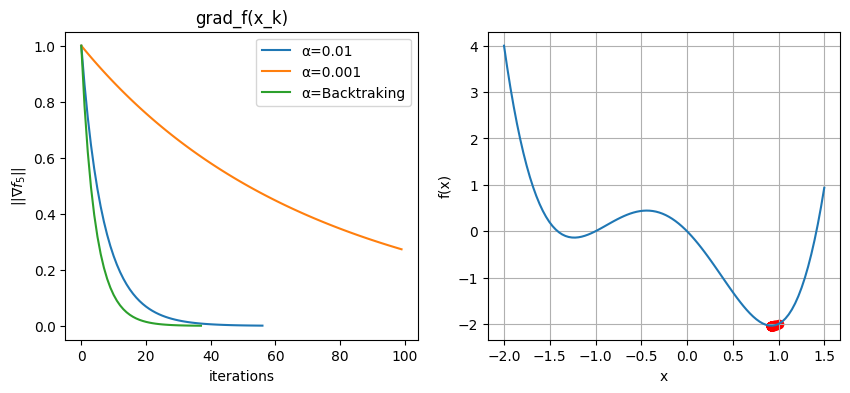

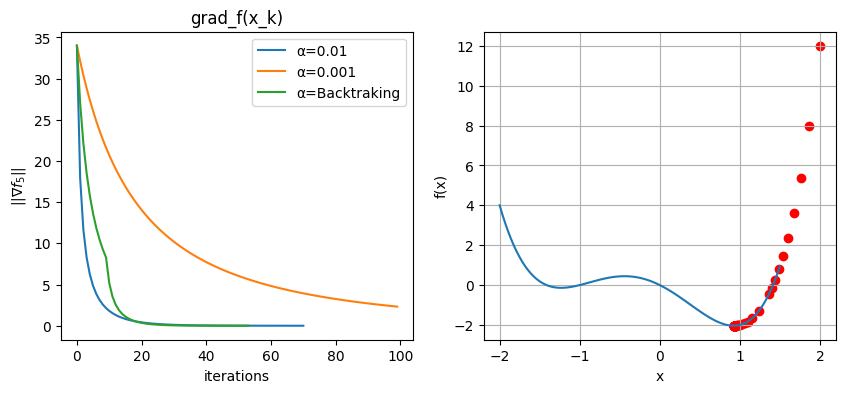

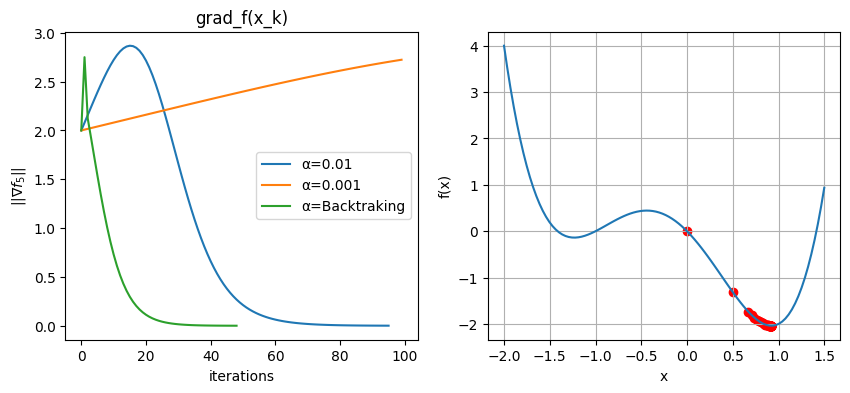

In [34]:
alpha=np.array([.01, .001,True])
xstart=[[-1],[1],[2],[0]]
legend=["α=0.01","α=0.001","α=Backtraking"]
for x_0 in xstart:
    plt.figure(figsize=[10,4])
    for i in alpha: 
        plt.subplot(1,2,1)
        plt.title("grad_f(x_k)")
        x,f_vec,err_vec,grad_vec,k=GD(f5,grad_f5,alpha=i,x0=x_0,kmax=100)
        k_vec=np.linspace(0,k-1,k,dtype=int)
        plt.plot(k_vec,err_vec[:k])
    plt.legend(legend)
    plt.xlabel("iterations")
    plt.ylabel("||∇$f_5$||")
    plt.subplot(1,2,2)
    plt.scatter(x[:k],f_vec[:k],c="r")
    x=np.linspace(-2,1.5,100)
    y=f5(x)
    plt.plot(x,y)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    '''plt.title("||x_k-x_true||")
    for  i in alpha:
        
        x,f_vec,err_vec,grad_vec,k=GD(f5,grad_f5,alpha=i,x0=x_0,kmax=100)
        k_vec=np.linspace(0,k-1,k,dtype=int)
        error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
        plt.plot(k_vec,error[:k])
    plt.legend(legend)'''
    
    plt.show()

# Stochastic Gradient Descent

In [11]:
data=pd.read_csv("data.csv")
data=np.array(data)
digits=[0,9]

In [12]:
import math
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


#suppress warnings
warnings.filterwarnings('ignore')


def sigmoid(x):
    return 1./(1+math.e**(-x))
    
def f(w,xhat):
    return sigmoid(xhat.T@w)

def ell(w,Xcheck,Y):
    vec_f=np.array([f(w,Xcheck[:,i]) for i in range(Xcheck.shape[1])])
    return (1/len(Y))*np.linalg.norm(vec_f-Y,2)

def grad_ell(w,Xcheck,Y):
    sum=0
    for i in range(Xcheck.shape[1]):
        func=f(w,Xcheck[:,i])
        sum+=func*(1-func)*(func-Y[i])*Xcheck[:,i]
    #return Xcheck@(np.multiply(np.multiply(f(w,Xcheck),1-f(w,Xcheck)),f(w,Xcheck)-Y))
    return  np.array(sum)/Xcheck.shape[1]


def predict(w,Xcheck,threshold=0.5):
    fw=f(w,Xcheck)
    preds=np.zeros((Xcheck.shape[1],))
    preds=fw>threshold
    return preds

def accuracy(Y_1, Y_2):
    Y_2[Y_2==digits[0]]=0
    Y_2[Y_2==digits[1]]=1
    array = Y_1 == Y_2
    return len(array[array==True])/len(array)


In [13]:
def split_data(dataset,digits,TrainPercentage):
    X=dataset[:,1:].T
    Y=dataset[:,0]
    ind=[i for i in range(len(Y)) if Y[i] in digits]       
    Yp=Y[ind]
    Xp=X[:,ind]
    Ntrain=int(Yp.shape[0]*TrainPercentage)
    Xp=np.concatenate((np.ones((1,len(Yp))),Xp),axis=0)
    Xtrain,Ytrain=Xp[:,:Ntrain],Yp[:Ntrain]
    Xtest,Ytest=Xp[:,Ntrain:],Yp[Ntrain:]
    return Xtrain,Ytrain,Xtest,Ytest

def SGD(l,grad_l,w0,data,batch_size,n_epoch):
    alpha=0.0001
    k=0
    X,y=data
    X=X-np.expand_dims(np.mean(X,axis=1),1) 
    
    y[y==digits[0]]=0
    y[y==digits[1]]=1
   
    d,N=X.shape
    n_batch_per_epoch=N//batch_size
    
    w=np.array(w0)
    fval=np.zeros((n_epoch,))
    gradl=np.zeros((n_epoch,d))
    err=np.zeros((n_epoch,))
    w_vec=np.zeros((n_batch_per_epoch*n_epoch,len(w0)))
    for epoch in range(n_epoch):
        index=np.linspace(0,len(y)-1,len(y),dtype=int)
        np.random.shuffle(index)
        X=X[:,index]
        y=y[index]
        for i in range(n_batch_per_epoch):
            Xbetch=X[:,(i*batch_size):((i+1)*batch_size)]
            ybetch=y[(i*batch_size):((i+1)*batch_size)]
            w=w-alpha*grad_ell(w,Xbetch,ybetch) 
            w_vec[epoch * n_batch_per_epoch + i, :] = w
            
        fval[epoch] = ell(w,X,y)
        gradl[epoch,:] = grad_ell(w,X,y)
        err[epoch]=np.linalg.norm(grad_ell(w,X,y),2)
    return w_vec,fval,gradl,err



Xtrain,Ytrain,Xtest,Ytest=split_data(data,digits,0.7)



Accuracy: 0.9923878205128205


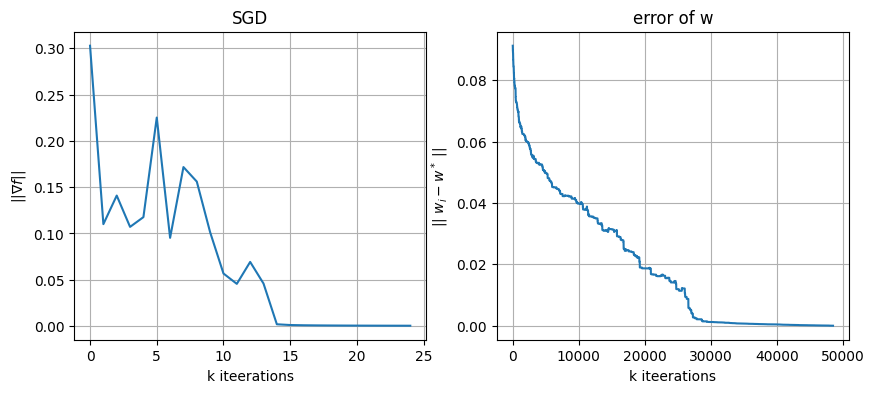

In [38]:
mean=0
sigma=1e-3
acc=[]
wdoppio=[]
w0=np.random.normal(mean,sigma,size=Xtrain.shape[0])
w_vec,fval,gradl,err=SGD(ell,grad_ell,w0,(Xtrain,Ytrain),batch_size=3,n_epoch=25)
wdoppio.append(w_vec[-1])
Ypred=predict(w_vec[-1],Xtest)
acc.append(accuracy(Ypred,Ytest))
print("Accuracy:",accuracy(Ypred,Ytest))
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title("SGD")
plt.xlabel("k iteerations")
plt.ylabel("||∇$f$||")
plt.plot(np.arange(len(err)),err)
plt.grid()
plt.subplot(1,2,2)
plt.title("error of w")
plt.xlabel("k iteerations")
plt.ylabel("|| $w_i - w^* $ || ")
errors=[np.linalg.norm(w-w_vec[-1]) for w in w_vec ]
plt.plot(np.arange(len(errors)),errors)
plt.grid()
plt.show()

num of iterations 100
0.9923878205128205


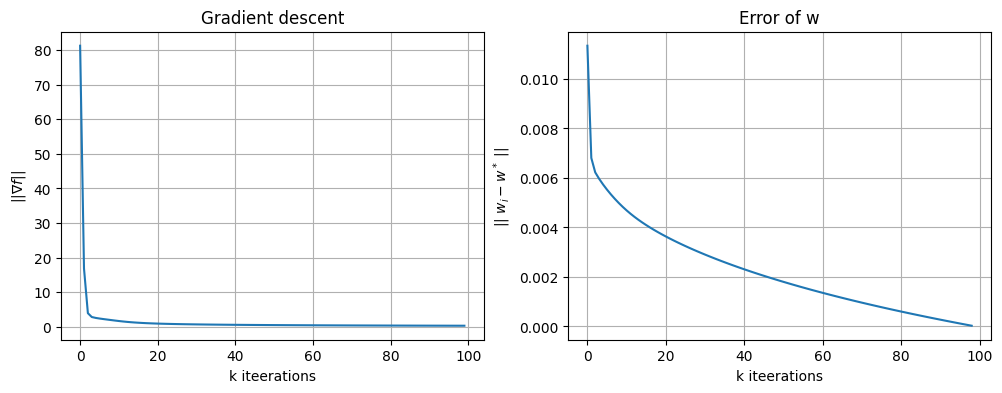

In [41]:
Ytrain[Ytrain==digits[0]]=0
Ytrain[Ytrain==digits[1]]=1
Ytest[Ytest==digits[0]]=0
Ytest[Ytest==digits[1]]=1
el = lambda w : ell(w,Xtrain,Ytrain)
grad__ell= lambda w : grad_ell(w,Xtrain,Ytrain)
mean=0
sigma=1e-3
w0=np.random.normal(mean,sigma,size=Xtrain.shape[0])
wvec,fval_g,grad_norm,_,k=GD(el,grad__ell,w0,alpha=0.0001)
print("num of iterations",k)
#print(wvec[k-1])
Ypred=predict(wvec[k-1],Xtest)
print(accuracy(Ypred,Ytest))
grad_norm = grad_norm[:k]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title("Gradient descent")
plt.xlabel("k iteerations")
plt.ylabel("||∇$f$||")
plt.plot(range(k),grad_norm[:k])
plt.grid()
plt.subplot(1,2,2)
plt.title("Error of w")
plt.xlabel("k iteerations")
plt.ylabel("|| $w_i - w^* $ || ")
errors=[np.linalg.norm(w-wvec[k-1],2) for w in wvec[:k-1]]
plt.plot(range(len(wvec[:k-1])),errors)
plt.grid()
plt.show()